In [ ]:
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt

path_to_fDepth     = '/home/gterren/dynamic_update/functional_forecast_dynamic_update/fDepth'
path_to_data       = '/home/gterren/dynamic_update/data'
path_to_validation = '/home/gterren/dynamic_update/validation'

(40150, 4)
     asset    nu       WIS
0        0   2.0  0.072110
1        0   3.0  0.071893
2        0   4.0  0.070298
3        0   5.0  0.069618
4        0   6.0  0.069822
..     ...   ...       ...
105      9   8.0  0.074068
106      9   9.0  0.072354
107      9  10.0  0.070131
108      9  11.0  0.068010
109      9  12.0  0.067300

[110 rows x 3 columns]
      nu       WIS
0    2.0  0.073225
1    3.0  0.072060
2    4.0  0.070327
3    5.0  0.069954
4    6.0  0.069716
5    7.0  0.069171
6    8.0  0.066629
7    9.0  0.063940
8   10.0  0.062669
9   11.0  0.061656
10  12.0  0.061349


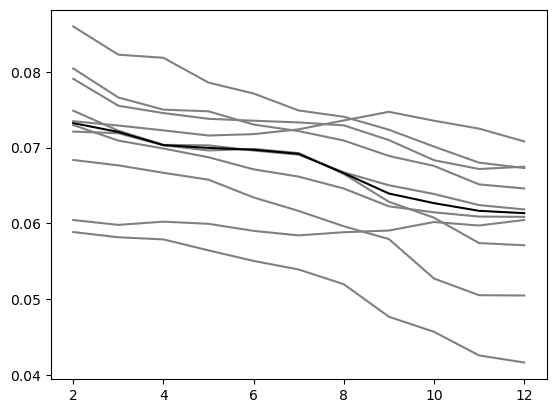

In [26]:
param_name = 'nu'

df_ = pd.read_csv(path_to_validation + f'/validation_ffc-WIS-{param_name}-144.csv')
df_ = df_[['asset', 'day', param_name, 'WIS']]
print(df_.shape)

df_ = df_.groupby(['asset', param_name]).agg({'WIS': 'median'}).reset_index(drop = False)
print(df_)

df_p_ = df_.groupby([param_name]).agg({'WIS': 'median'}).reset_index(drop = False)
print(df_p_)

plt.figure()
for asset in df_['asset'].unique():
    plt.plot(df_.loc[df_['asset'] == asset, param_name], df_.loc[df_['asset'] == asset, 'WIS'], 'gray')
plt.plot(df_p_[param_name], df_p_['WIS'], 'k')
#plt.ylim(0,)
plt.show()

(40150, 19)
      nu  RMSE_tau
0    2.0  0.316184
1    3.0  0.336285
2    4.0  0.314625
3    5.0  0.285263
4    6.0  0.314539
5    7.0  0.244997
6    8.0  0.330510
7    9.0  0.269051
8   10.0  0.281168
9   11.0  0.298907
10  12.0  0.264614


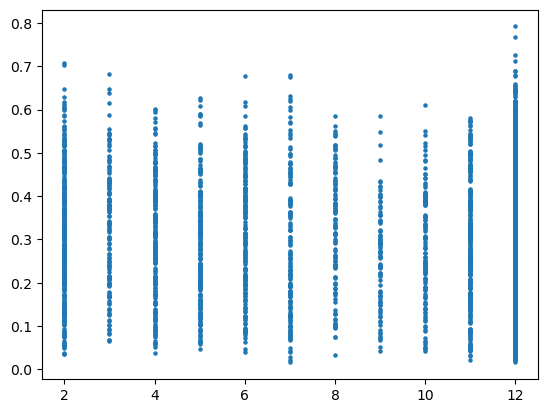

      nu    RMSE_s
0    2.0  0.189985
1    3.0  0.176258
2    4.0  0.140548
3    5.0  0.132286
4    6.0  0.147398
5    7.0  0.134937
6    8.0  0.161489
7    9.0  0.128638
8   10.0  0.111563
9   11.0  0.111292
10  12.0  0.103351


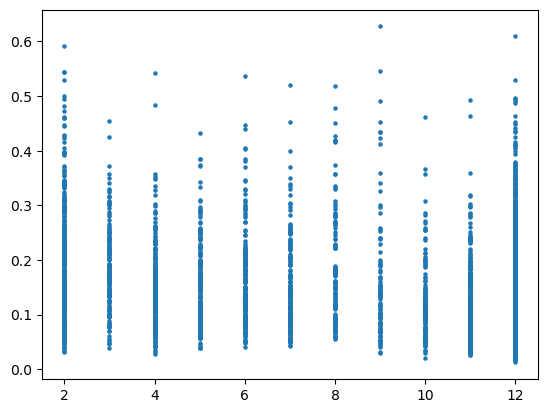

      nu       WIS
0    2.0  0.087316
1    3.0  0.079012
2    4.0  0.063872
3    5.0  0.069359
4    6.0  0.070861
5    7.0  0.062209
6    8.0  0.076222
7    9.0  0.047748
8   10.0  0.051183
9   11.0  0.045979
10  12.0  0.042103


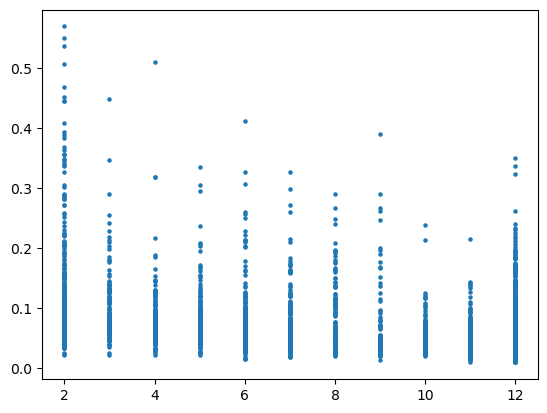

In [27]:
param_name = 'nu'

df_ = pd.read_csv(path_to_validation + f'/validation_ffc-WIS-{param_name}-144.csv')
print(df_.shape)
df_ = df_[['asset', 'day', param_name, 'WIS', 'RMSE_tau', 'RMSE_s']]

result = (
    df_.loc[df_.groupby(['asset', 'day'])['WIS'].idxmin(), ['asset', 'day', param_name, 'WIS', 'RMSE_tau', 'RMSE_s']]
    .reset_index(drop=True)
)

print(result.groupby([param_name]).agg({'RMSE_tau': 'median'}).reset_index(drop = False))
plt.figure()
plt.scatter(result[param_name], result['RMSE_tau'], s = 5)
plt.show()

print(result.groupby([param_name]).agg({'RMSE_s': 'median'}).reset_index(drop = False))
plt.figure()
plt.scatter(result[param_name], result['RMSE_s'], s = 5)
plt.show()

print(result.groupby([param_name]).agg({'WIS': 'median'}).reset_index(drop = False))
plt.figure()
plt.scatter(result[param_name], result['WIS'], s = 5)
plt.show()

In [127]:
df_ = pd.merge(df_1_, df_2_, on = ['asset', 'day'], how = 'inner') 

idx_ = df_['asset'] >= 0

print(df_.loc[idx_].groupby([param_name])['e1'].mean().reset_index(drop = False))

plt.figure()
plt.scatter(df_.loc[idx_, 'e1'], df_.loc[idx_, param_name], s = 2.)
plt.show()

KeyError: 'trust_rate'

(87600, 4)
    asset  trust_rate        WIS
0       0         1.0  12.032601
1       1         1.0  12.208088
2       2         1.0  13.271797
3       3         1.0   7.981600
4       4         1.0  15.784452
5       5         1.0   9.983660
6       6         1.0  13.140949
7       7         1.0  12.980415
8       8         1.0  11.615841
9       9         1.0  13.789536
10     10         1.0   9.131053
11     11         1.0  18.357498
12     12         1.0  11.011283
13     13         1.0  14.710406
14     14         1.0  14.494294
15     15         1.0  12.915230
16     16         1.0  15.591074
17     17         1.0   8.792511
18     18         1.0  13.177383
19     19         1.0  12.113133


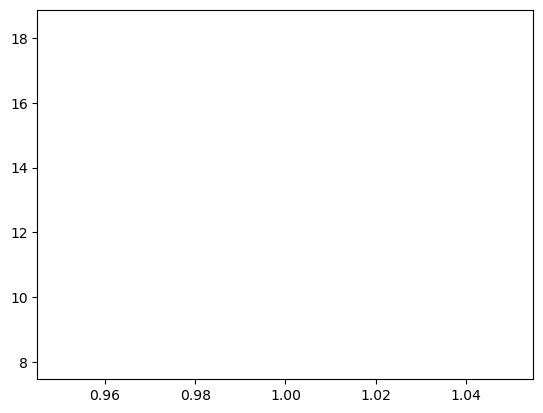

In [10]:
print(df_.shape)

table = df_.groupby(['asset', param_name]).agg({'WIS': 'median'}).reset_index(drop = False)
print(table)

plt.figure()
for asset in table['asset'].unique():
    plt.plot(table.loc[table['asset'] == asset, param_name], table.loc[table['asset'] == asset, 'WIS'])
plt.show()

# table1 = df_.groupby([param_name]).agg({'WIS': 'median'}).reset_index(drop = False)
# table2 = df_.groupby([param_name]).agg({'WIS': 'mean'}).reset_index(drop = False)

# plt.figure()
# plt.plot(table1[param_name], table1['WIS'])
# plt.plot(table2[param_name], table2['WIS'])
# plt.show()
